___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and **the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.** 

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import plotly.express as px
sns.set()

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (12,8)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_columns', None)

In [78]:
df0 = pd.read_csv('Churn_Modelling.csv')
df = df0.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0
2,3,15619304,Onio,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1
3,4,15701354,Boni,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [79]:
df.shape

(10000, 14)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [81]:
df.isnull().sum().any()

False

In [82]:
df.duplicated().sum()

0

In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0000,5000.5000,2886.8957,1.0000,2500.7500,5000.5000,7500.2500,10000.0000
CustomerId,10000.0000,15690940.5694,71936.1861,15565701.0000,15628528.2500,15690738.0000,15753233.7500,15815690.0000
CreditScore,10000.0000,650.5288,96.6533,350.0000,584.0000,652.0000,718.0000,850.0000
Age,10000.0000,38.9218,10.4878,18.0000,32.0000,37.0000,44.0000,92.0000
Tenure,10000.0000,5.0128,2.8922,0.0000,3.0000,5.0000,7.0000,10.0000
Balance,10000.0000,76485.8893,62397.4052,0.0000,0.0000,97198.5400,127644.2400,250898.0900
NumOfProducts,10000.0000,1.5302,0.5817,1.0000,1.0000,1.0000,2.0000,4.0000
HasCrCard,10000.0000,0.7055,0.4558,0.0000,0.0000,1.0000,1.0000,1.0000
IsActiveMember,10000.0000,0.5151,0.4998,0.0000,0.0000,1.0000,1.0000,1.0000
EstimatedSalary,10000.0000,100090.2399,57510.4928,11.5800,51002.1100,100193.9150,149388.2475,199992.4800


The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- `*` **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

In [84]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0
2,3,15619304,Onio,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1
3,4,15701354,Boni,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0


## RowNumber

In [85]:
df = df.drop('RowNumber', axis = 1)

## CustomerId

In [86]:
df = df.drop('CustomerId', axis = 1)

## Surname

In [87]:
df = df.drop('Surname', axis = 1)

## CreditScore

In [88]:
import plotly.express as px 
fig = px.histogram(df['CreditScore'], nbins=60, marginal="box",  opacity=0.75)
fig.show()

## Geography

In [89]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

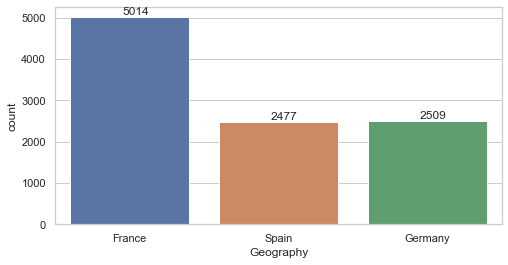

In [90]:
plt.rcParams["figure.figsize"] = (8, 4)
ax = sns.countplot(df["Geography"])
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 50))

plt.show()

## Gender

In [91]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

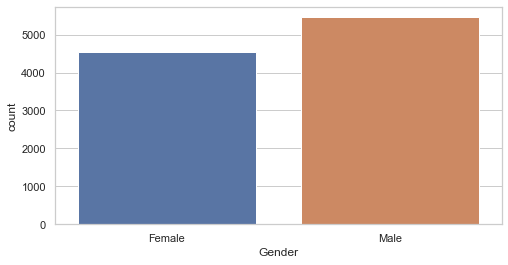

In [92]:
sns.countplot(df["Gender"]);

## Age

In [93]:
df.Age.value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [94]:
fig = px.histogram(df['Age'], nbins=60, marginal="box",  opacity=0.75)
fig.show()

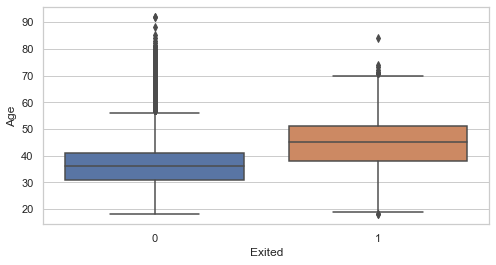

In [95]:
sns.boxplot(x = 'Exited', y = 'Age', data = df);

## Tenure

In [96]:
# The number of years for which the customer has been with the bank.
df['Tenure'].value_counts(dropna = False)

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [97]:
fig = px.histogram(df['Tenure'], marginal="box",  opacity=0.75)
fig.show()

## Balance

In [98]:
df['Balance'].value_counts(dropna = False)

0.0000         3617
130170.8200       2
105473.7400       2
85304.2700        1
159397.7500       1
               ... 
81556.8900        1
112687.6900       1
108698.9600       1
238387.5600       1
130142.7900       1
Name: Balance, Length: 6382, dtype: int64

In [99]:
fig = px.histogram(df['Balance'], nbins=60, marginal="box",  opacity=0.75)
fig.show()

## NumOfProducts

In [100]:
df['NumOfProducts'].value_counts(dropna = False)

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

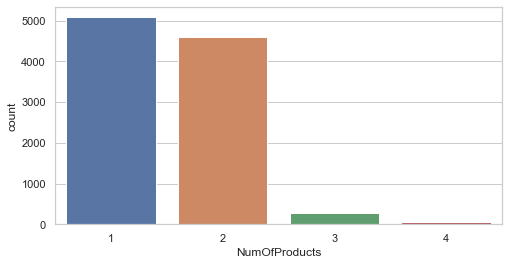

In [101]:
sns.countplot(df['NumOfProducts']);

## HasCrCard

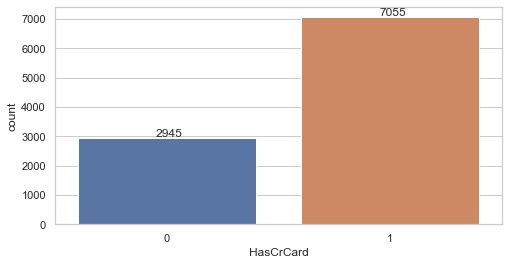

In [102]:
# number of credit cards 
plt.rcParams["figure.figsize"] = (8, 4)
ax = sns.countplot(df["HasCrCard"])
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 50))

plt.show()

## IsActiveMember

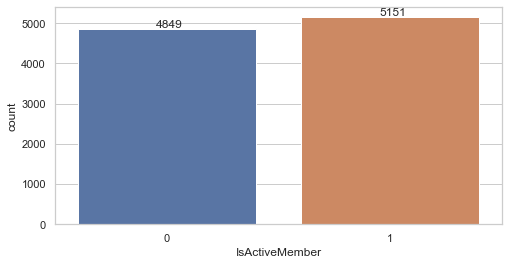

In [103]:
plt.rcParams["figure.figsize"] = (8, 4)
ax = sns.countplot(df["IsActiveMember"])
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 50))

plt.show()

## EstimatedSalary

In [104]:
fig = px.histogram(df['EstimatedSalary'], nbins=100, marginal="box",  opacity=0.75)
fig.show()

## Exited

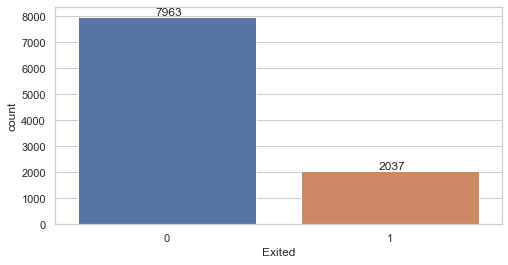

In [105]:
plt.rcParams["figure.figsize"] = (8, 4)
ax = sns.countplot(df["Exited"])
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 50))

plt.show()

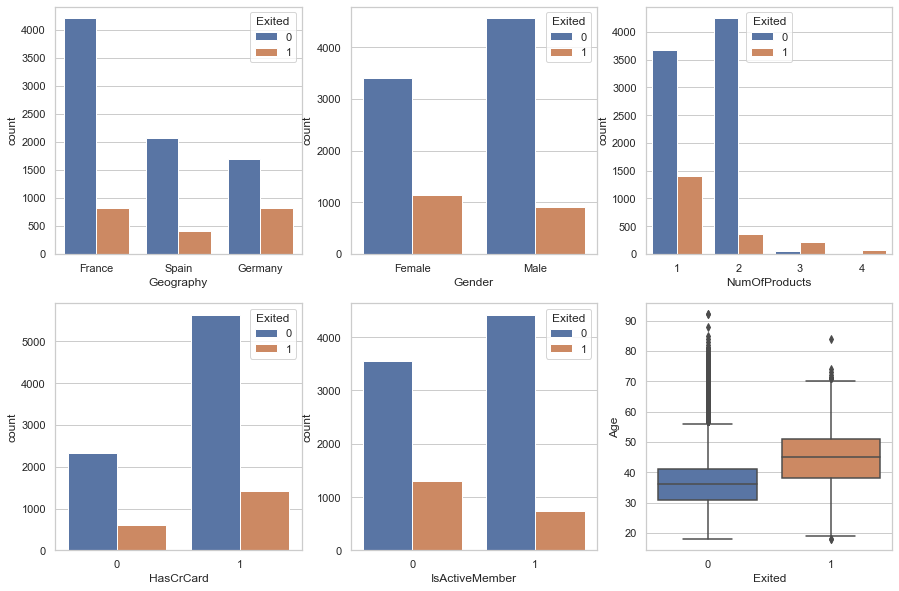

In [106]:
category = ["Geography", "Gender", "NumOfProducts", "HasCrCard", "IsActiveMember"]
index = 0
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i in category:
    index += 1
    plt.subplot(2, 3, index)
    sns.countplot(data=df, x=i, hue="Exited")

sns.boxplot(x='Exited', y='Age', data=df, ax=axes[1,2]);

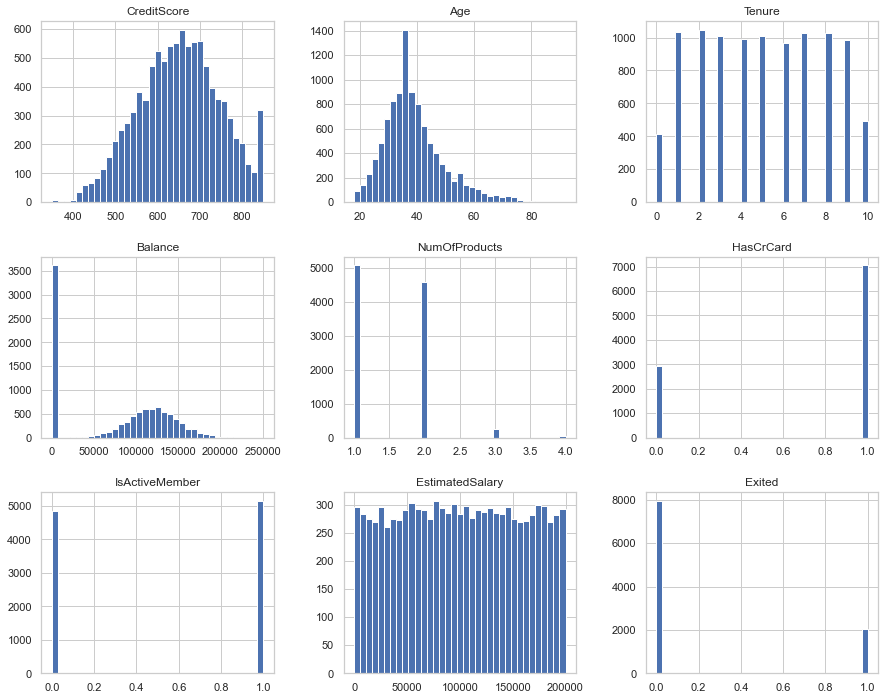

In [107]:
df.hist(figsize=(15, 12), bins=35);

In [108]:
df.corr()[['Exited']].sort_values(by='Exited', ascending=False)

,Exited
Exited,1.0000
Age,0.2853
Balance,0.1185
EstimatedSalary,0.0121
HasCrCard,-0.0071
Tenure,-0.0140
CreditScore,-0.0271
NumOfProducts,-0.0478
IsActiveMember,-0.1561


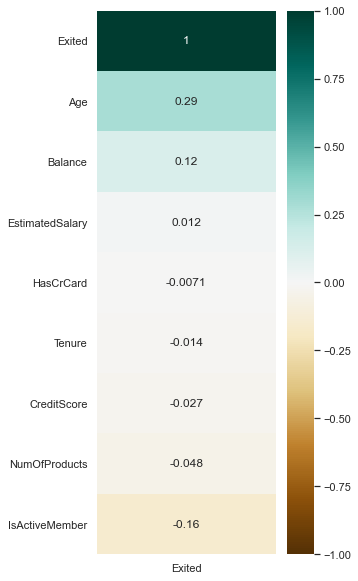

In [109]:
# for the target variable
plt.figure(figsize=(4, 10))
sns.heatmap(data=df.corr()[['Exited']].sort_values(by='Exited', ascending=False),
            vmin = -1, vmax = 1, 
            annot=True, 
            cmap='BrBG');


## Dummy

In [110]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.0000,1,1,1,101348.8800,1,0,0,0
1,608,41,1,83807.8600,1,0,1,112542.5800,0,0,1,0
2,502,42,8,159660.8000,3,1,0,113931.5700,1,0,0,0
3,699,39,1,0.0000,2,0,0,93826.6300,0,0,0,0
4,850,43,2,125510.8200,1,1,1,79084.1000,0,0,1,0


In [111]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0000,650.5288,96.6533,350.0000,584.0000,652.0000,718.0000,850.0000
Age,10000.0000,38.9218,10.4878,18.0000,32.0000,37.0000,44.0000,92.0000
Tenure,10000.0000,5.0128,2.8922,0.0000,3.0000,5.0000,7.0000,10.0000
Balance,10000.0000,76485.8893,62397.4052,0.0000,0.0000,97198.5400,127644.2400,250898.0900
NumOfProducts,10000.0000,1.5302,0.5817,1.0000,1.0000,1.0000,2.0000,4.0000
HasCrCard,10000.0000,0.7055,0.4558,0.0000,0.0000,1.0000,1.0000,1.0000
IsActiveMember,10000.0000,0.5151,0.4998,0.0000,0.0000,1.0000,1.0000,1.0000
EstimatedSalary,10000.0000,100090.2399,57510.4928,11.5800,51002.1100,100193.9150,149388.2475,199992.4800
Exited,10000.0000,0.2037,0.4028,0.0000,0.0000,0.0000,0.0000,1.0000
Geography_Germany,10000.0000,0.2509,0.4336,0.0000,0.0000,0.0000,1.0000,1.0000


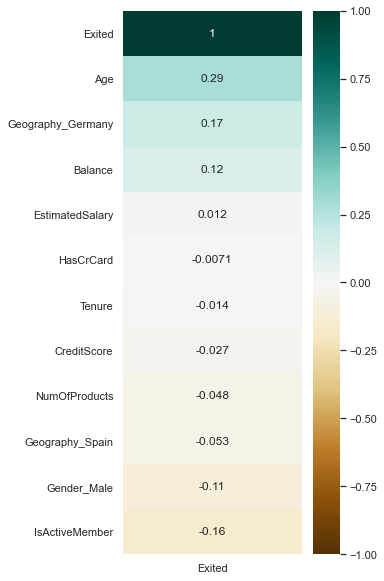

In [112]:
plt.figure(figsize=(4, 10))
sns.heatmap(data=df.corr()[['Exited']].sort_values(by='Exited', ascending=False),
            vmin = -1, vmax = 1, 
            annot=True, 
            cmap='BrBG');

# Preprocessing of Data
- Train | Test Split, Scalling

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [114]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [115]:
seed = 101

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=seed)

In [117]:
from sklearn.preprocessing import MinMaxScaler 

In [118]:
scaler = MinMaxScaler()

In [119]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [120]:
print(X_train.shape)
print(X_test.shape)

(9000, 11)
(1000, 11)


# Modelling & Model Performance

## without class_weigth

In [121]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix

In [122]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [123]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

- **Activation:** <a href="https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/" target="_blank">How to Choose an Activation Function for Deep Learning</a> 
- **Hidden Layer:** <a href="https://www.linkedin.com/pulse/choosing-number-hidden-layers-neurons-neural-networks-sachdev/" target="_blank">Choosing number of Hidden Layers and number of hidden neurons in Neural Networks</a> 
<br>*The most appropriate number of hidden neurons is `sqrt(input layer nodes x output layer nodes)`*<br>
- *First hidden layer `input layer nodes x 1.5`*
---
- **loss:** <a href="https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/" target="_blank">How to Choose Loss Functions When Training Deep Learning Neural Networks</a>
- **metrics:** <a href="https://keras.io/api/metrics/classification_metrics/" target="_blank">Choosing Classification metrics based on True/False positives & negative</a>


In [124]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1])) 
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['Recall'])

# - accuracy:  ratio of number of correct predictions,  It is useful when all classes are of equal importance.
# - If the goal is to detect all the positive samples (without caring whether negative samples
# would be misclassified as positive), then use recall.
# - Use precision if the problem is sensitive to classifying a sample as Positive in general, i.e. 
# including Negative samples that were falsely classified as Positive.

In [125]:
model.weights

[<tf.Variable 'dense_21/kernel:0' shape=(11, 16) dtype=float32, numpy=
 array([[-0.02496374, -0.22216189, -0.4590583 , -0.24820021, -0.00340647,
          0.2683902 ,  0.45741627,  0.19408217, -0.11391607, -0.2638993 ,
          0.2015141 ,  0.3585575 ,  0.33938047, -0.09717098, -0.04024169,
         -0.19884366],
        [ 0.3834103 ,  0.12050101,  0.08189908, -0.3680364 , -0.08690095,
          0.32570353,  0.4374673 , -0.29709697, -0.10897815,  0.0625622 ,
          0.22558632,  0.36786857, -0.44758043,  0.09789845,  0.39727452,
          0.05636111],
        [ 0.14469555,  0.06275365,  0.46489456,  0.26229838, -0.2988079 ,
          0.04060945, -0.46463844,  0.22434428, -0.43105966, -0.1175507 ,
         -0.12524301,  0.3819699 ,  0.12055233,  0.4515898 , -0.24108504,
          0.2997786 ],
        [ 0.29824063, -0.04744229, -0.22745419, -0.25769663, -0.03320453,
         -0.36965573,  0.06546316,  0.0134761 , -0.08012331,  0.0626637 ,
          0.02225938, -0.33195317, -0.37954047

In [126]:
from tensorflow.keras.callbacks import EarlyStopping

**Early stopping** is a feature that enables the training to be automatically stopped when a chosen metric has stopped improving. <br><a href="https://medium.com/zero-equals-false/early-stopping-to-avoid-overfitting-in-neural-network-keras-b68c96ed05d9" target="_blank">Early Stopping to avoid overfitting in neural network-Keras</a> <br>
<br><a href="https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/" target="_blank">Use Early Stopping to Halt the Training of Neural Networks At the Right Time</a> <br>


- **Monitor:** Performance measure to monitor in order to end training 
- **Mode:**  argument will need to be specified as whether the objective of the chosen metric is to increase (maximize or ‘max‘) or to decrease (minimize or ‘min‘).
- **patience**: This is the number of epochs without improvement after which training will be early stopped

In [127]:
early_stop = EarlyStopping(monitor="val_loss", # performance will be monitored on validation split
                           mode="auto",
                           verbose=1,
                           patience=20,
                           restore_best_weights=True)

In [128]:
Epochs = 1000
Batch=153

In [129]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.15,
          batch_size=Batch,
          epochs=Epochs,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/1000
50/50 [==============================] - 1s 6ms/step - loss: 0.9993 - recall: 0.9802 - val_loss: 0.7474 - val_recall: 0.8643
Epoch 2/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6356 - recall: 0.2978 - val_loss: 0.5504 - val_recall: 0.0000e+00
Epoch 3/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5195 - recall: 6.3776e-04 - val_loss: 0.4871 - val_recall: 0.0000e+00
Epoch 4/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4887 - recall: 0.0000e+00 - val_loss: 0.4742 - val_recall: 0.0000e+00
Epoch 5/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4812 - recall: 0.0032 - val_loss: 0.4695 - val_recall: 0.0039
Epoch 6/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4752 - recall: 0.0293 - val_loss: 0.4657 - val_recall: 0.1202
Epoch 7/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4694 - recall: 0.1033 - val_loss: 0.4611 - val_recall: 0.1357
Epoch 8/1000
5

Epoch 60/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3464 - recall: 0.4407 - val_loss: 0.3530 - val_recall: 0.4031
Epoch 61/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3461 - recall: 0.4388 - val_loss: 0.3519 - val_recall: 0.4070
Epoch 62/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3461 - recall: 0.4420 - val_loss: 0.3548 - val_recall: 0.3643
Epoch 63/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3462 - recall: 0.4324 - val_loss: 0.3537 - val_recall: 0.4341
Epoch 64/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3459 - recall: 0.4413 - val_loss: 0.3534 - val_recall: 0.4186
Epoch 65/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3454 - recall: 0.4432 - val_loss: 0.3530 - val_recall: 0.4225
Epoch 66/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3452 - recall: 0.4458 - val_loss: 0.3517 - val_recall: 0.4070
Epoch 67/1000
50/50 [======

Epoch 119/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3382 - recall: 0.4592 - val_loss: 0.3473 - val_recall: 0.4341
Epoch 120/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3384 - recall: 0.4611 - val_loss: 0.3482 - val_recall: 0.4109
Epoch 121/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3378 - recall: 0.4681 - val_loss: 0.3462 - val_recall: 0.4264
Epoch 122/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3381 - recall: 0.4662 - val_loss: 0.3476 - val_recall: 0.4225
Epoch 123/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3387 - recall: 0.4547 - val_loss: 0.3458 - val_recall: 0.4419
Epoch 124/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3372 - recall: 0.4636 - val_loss: 0.3459 - val_recall: 0.4302
Epoch 125/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3378 - recall: 0.4547 - val_loss: 0.3522 - val_recall: 0.5078
Epoch 126/1000
50/50

50/50 [==============================] - 0s 2ms/step - loss: 0.3304 - recall: 0.4828 - val_loss: 0.3465 - val_recall: 0.4457
Epoch 178/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3302 - recall: 0.4904 - val_loss: 0.3440 - val_recall: 0.4225
Epoch 179/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3307 - recall: 0.4821 - val_loss: 0.3491 - val_recall: 0.3760
Epoch 180/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3310 - recall: 0.4790 - val_loss: 0.3450 - val_recall: 0.4380
Epoch 181/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3300 - recall: 0.4860 - val_loss: 0.3439 - val_recall: 0.4225
Epoch 182/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3299 - recall: 0.4879 - val_loss: 0.3452 - val_recall: 0.4147
Epoch 183/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3302 - recall: 0.4821 - val_loss: 0.3452 - val_recall: 0.4264
Epoch 184/1000
50/50 [=============

In [130]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 16)                192       
                                                                 
 dense_22 (Dense)            (None, 8)                 136       
                                                                 
 dense_23 (Dense)            (None, 4)                 36        
                                                                 
 dense_24 (Dense)            (None, 1)                 5         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [131]:
loss_df = pd.DataFrame(model.history.history) 
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.9993,0.9802,0.7474,0.8643
1,0.6356,0.2978,0.5504,0.0000
2,0.5195,0.0006,0.4871,0.0000
3,0.4887,0.0000,0.4742,0.0000
4,0.4812,0.0032,0.4695,0.0039


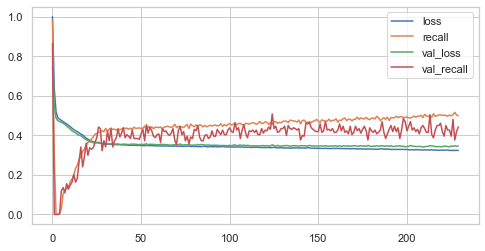

In [132]:
loss_df.plot();

In [133]:
model.evaluate(X_test, y_test, verbose=0)

[0.34285053610801697, 0.5071089863777161]

###  Prediction to see "confusion matrix" and "classification report"

In [134]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")  
# 1 olma ihtimali 0.5 ten büyükse 1 yap
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 921us/step
[[746  43]
 [104 107]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       789
           1       0.71      0.51      0.59       211

    accuracy                           0.85      1000
   macro avg       0.80      0.73      0.75      1000
weighted avg       0.84      0.85      0.84      1000



In [135]:
eval_metric(y_test, y_pred)

r2_score: 0.11700574847278056 
mae: 0.147 
mse: 0.147 
rmse: 0.38340579025361626


###  ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [136]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

32/32 [==============================] - 0s 1ms/step


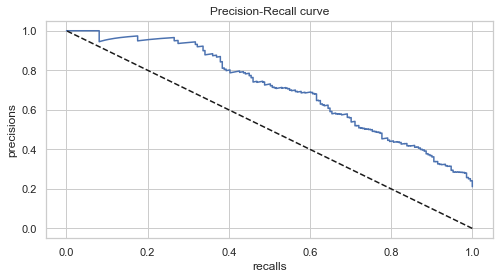

In [137]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.plot([1, 0], [0, 1], 'k--')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()
# roc curve, sınıflandırma performansını gosterir

In [138]:
average_precision_score(y_test, y_pred_proba)

0.7086642122934683

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

<a href="https://androidkt.com/set-class-weight-for-imbalance-dataset-in-keras/" target="_blank">How to set class weight for imbalance dataset in Keras?</a>



### Create The Model

In [139]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1])) 
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['Recall'])

In [140]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

# sonucun neye gore olusturulmasini istiyoruz, kac ciktimiz var bilgilerini veriyoruz 
# verilen sonuc tuple donduruyor, tuple indexleyerek dict yapiyoruz
# hangi class'a hangi agirliklari vermesi gerekiyor? onu hesapliyor

{0: 0.6272651240591023, 1: 2.4644030668127055}

In [141]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=20)

In [142]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.15,
          batch_size=Batch,
          epochs=Epochs,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/1000
50/50 [==============================] - 1s 6ms/step - loss: 0.7967 - recall: 0.9943 - val_loss: 0.7882 - val_recall: 0.9884
Epoch 2/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6765 - recall: 0.8597 - val_loss: 0.6879 - val_recall: 0.6395
Epoch 3/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6382 - recall: 0.6671 - val_loss: 0.6601 - val_recall: 0.6240
Epoch 4/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6179 - recall: 0.6703 - val_loss: 0.6292 - val_recall: 0.5969
Epoch 5/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6033 - recall: 0.6747 - val_loss: 0.6080 - val_recall: 0.5969
Epoch 6/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5921 - recall: 0.7009 - val_loss: 0.6179 - val_recall: 0.6783
Epoch 7/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5823 - recall: 0.6894 - val_loss: 0.5987 - val_recall: 0.6667
Epoch 8/1000
50/50 [==============

50/50 [==============================] - 0s 3ms/step - loss: 0.4724 - recall: 0.7583 - val_loss: 0.4643 - val_recall: 0.7209
Epoch 61/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4706 - recall: 0.7647 - val_loss: 0.4705 - val_recall: 0.7248
Epoch 62/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4700 - recall: 0.7602 - val_loss: 0.4441 - val_recall: 0.6899
Epoch 63/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4711 - recall: 0.7519 - val_loss: 0.4976 - val_recall: 0.7597
Epoch 64/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4693 - recall: 0.7653 - val_loss: 0.4911 - val_recall: 0.7558
Epoch 65/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4695 - recall: 0.7596 - val_loss: 0.4928 - val_recall: 0.7558
Epoch 66/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4683 - recall: 0.7666 - val_loss: 0.4744 - val_recall: 0.7287
Epoch 67/1000
50/50 [====================

In [143]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 16)                192       
                                                                 
 dense_26 (Dense)            (None, 8)                 136       
                                                                 
 dense_27 (Dense)            (None, 4)                 36        
                                                                 
 dense_28 (Dense)            (None, 1)                 5         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

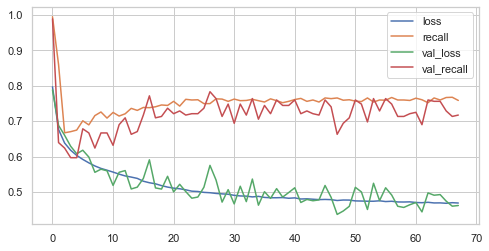

In [144]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [145]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# recall result is better on without class_weight but precision is better with class_weight
#      precision    recall  f1-score   support
# 0       0.88      0.95      0.91       789
# 1       0.71      0.51      0.59       211

32/32 [==============================] - 0s 989us/step
[[616 173]
 [ 54 157]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       789
           1       0.48      0.74      0.58       211

    accuracy                           0.77      1000
   macro avg       0.70      0.76      0.71      1000
weighted avg       0.83      0.77      0.79      1000



32/32 [==============================] - 0s 1ms/step


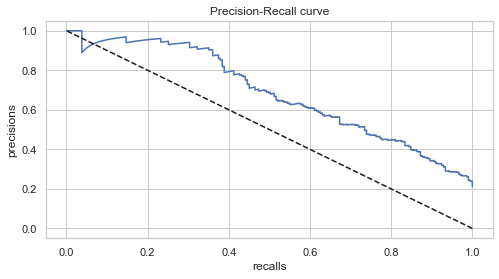

In [146]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.plot([1,0],[0,1],'k--')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [147]:
average_precision_score(y_test, y_pred_proba) 
# result without class: 0.7086642122934683

0.6869478782108527

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [148]:
from tensorflow.keras.optimizers import Adam

In [149]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1])) 
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr = 0.003)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['Recall'])

In [150]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.15,
          batch_size=Batch,
          epochs=Epochs,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/1000
50/50 [==============================] - 1s 5ms/step - loss: 0.7457 - recall: 0.4298 - val_loss: 0.5130 - val_recall: 0.0000e+00
Epoch 2/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4888 - recall: 0.0000e+00 - val_loss: 0.4692 - val_recall: 0.0000e+00
Epoch 3/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4700 - recall: 0.0395 - val_loss: 0.4580 - val_recall: 0.0736
Epoch 4/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4567 - recall: 0.1193 - val_loss: 0.4398 - val_recall: 0.0814
Epoch 5/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4385 - recall: 0.1716 - val_loss: 0.4183 - val_recall: 0.2054
Epoch 6/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4229 - recall: 0.2494 - val_loss: 0.4064 - val_recall: 0.1589
Epoch 7/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4108 - recall: 0.2742 - val_loss: 0.3982 - val_recall: 0.3256
Epoch 8/1000
50/50 [==

Epoch 60/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3336 - recall: 0.4802 - val_loss: 0.3519 - val_recall: 0.3915
Epoch 61/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3325 - recall: 0.4809 - val_loss: 0.3566 - val_recall: 0.3682
Epoch 62/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3339 - recall: 0.4802 - val_loss: 0.3523 - val_recall: 0.4225
Epoch 63/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3322 - recall: 0.4841 - val_loss: 0.3517 - val_recall: 0.4109
Epoch 64/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3322 - recall: 0.4866 - val_loss: 0.3531 - val_recall: 0.4302
Epoch 64: early stopping


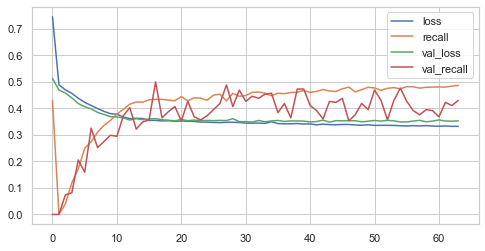

In [151]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [152]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.35249361395835876
recall :  0.5071089863777161


In [153]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# results without class 
#      precision    recall  f1-score   support
# 0       0.88      0.95      0.91       789
# 1       0.71      0.51      0.59       211

32/32 [==============================] - 0s 1ms/step
[[741  48]
 [104 107]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       789
           1       0.69      0.51      0.58       211

    accuracy                           0.85      1000
   macro avg       0.78      0.72      0.75      1000
weighted avg       0.84      0.85      0.84      1000



In [154]:
precision_recall_curve(y_test, y_pred_proba)

(array([0.211     , 0.21121121, 0.21142285, ..., 1.        , 1.        ,
        1.        ]),
 array([1.        , 1.        , 1.        , ..., 0.00947867, 0.00473934,
        0.        ]),
 array([0.0198013 , 0.02406902, 0.0248485 , 0.02693272, 0.02738518,
        0.02821527, 0.02832036, 0.02943697, 0.03158119, 0.03198673,
        0.0321741 , 0.03260734, 0.03292276, 0.03364143, 0.0341731 ,
        0.0342068 , 0.03421561, 0.03510112, 0.03531405, 0.03534726,
        0.03562632, 0.03569562, 0.03583593, 0.03617591, 0.03686705,
        0.03727007, 0.03756947, 0.03816072, 0.03862549, 0.03913308,
        0.03920373, 0.03928564, 0.03942107, 0.03952834, 0.03971224,
        0.04015667, 0.04017032, 0.04036157, 0.04109127, 0.04222953,
        0.04282295, 0.04290035, 0.04326808, 0.04340039, 0.04358431,
        0.04374013, 0.04400508, 0.04410791, 0.04432479, 0.04445666,
        0.04457364, 0.04521088, 0.04529084, 0.04555482, 0.04574501,
        0.0457665 , 0.04578509, 0.04603836, 0.04689096, 0.0470

### Add Dropout Layer

In [155]:
from tensorflow.keras.layers import Dropout

In [156]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1])) 
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr = 0.001)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['Recall'])

### Add Early Stop

#### Monitor the "val_loss" as metric

In [157]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=15)

In [158]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.15,
          batch_size=Batch,
          epochs=Epochs,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/1000
50/50 [==============================] - 1s 9ms/step - loss: 1.0866 - recall: 0.8667 - val_loss: 0.7703 - val_recall: 0.9147
Epoch 2/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.7068 - recall: 0.4522 - val_loss: 0.5863 - val_recall: 0.0039
Epoch 3/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5887 - recall: 0.1020 - val_loss: 0.5172 - val_recall: 0.0000e+00
Epoch 4/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5520 - recall: 0.0517 - val_loss: 0.4916 - val_recall: 0.0000e+00
Epoch 5/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5383 - recall: 0.0332 - val_loss: 0.4845 - val_recall: 0.0000e+00
Epoch 6/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5312 - recall: 0.0287 - val_loss: 0.4815 - val_recall: 0.0000e+00
Epoch 7/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5218 - recall: 0.0383 - val_loss: 0.4760 - val_recall: 0.0000e+00
Epoch 8/1000
5

Epoch 60/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4018 - recall: 0.3125 - val_loss: 0.3602 - val_recall: 0.3217
Epoch 61/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3984 - recall: 0.3355 - val_loss: 0.3601 - val_recall: 0.2868
Epoch 62/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3949 - recall: 0.3240 - val_loss: 0.3586 - val_recall: 0.3023
Epoch 63/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3965 - recall: 0.3348 - val_loss: 0.3574 - val_recall: 0.3333
Epoch 64/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3985 - recall: 0.3170 - val_loss: 0.3607 - val_recall: 0.2868
Epoch 65/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3980 - recall: 0.3144 - val_loss: 0.3561 - val_recall: 0.3333
Epoch 66/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3911 - recall: 0.3253 - val_loss: 0.3561 - val_recall: 0.3605
Epoch 67/1000
50/50 [======

Epoch 119/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3744 - recall: 0.3469 - val_loss: 0.3483 - val_recall: 0.3488
Epoch 120/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3705 - recall: 0.3629 - val_loss: 0.3486 - val_recall: 0.3178
Epoch 121/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3753 - recall: 0.3508 - val_loss: 0.3459 - val_recall: 0.3411
Epoch 122/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3793 - recall: 0.3418 - val_loss: 0.3485 - val_recall: 0.3488
Epoch 123/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3735 - recall: 0.3418 - val_loss: 0.3469 - val_recall: 0.3527
Epoch 124/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3718 - recall: 0.3712 - val_loss: 0.3483 - val_recall: 0.3256
Epoch 125/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3708 - recall: 0.3457 - val_loss: 0.3483 - val_recall: 0.3527
Epoch 126/1000
50/50

 - model egitildikce val_loss degeri giderek dustu 

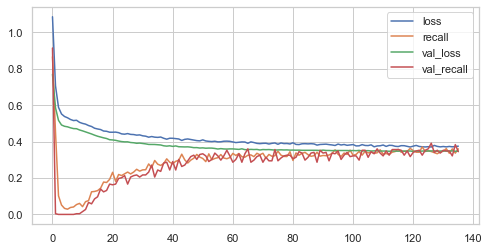

In [159]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [160]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.3430273234844208
recall :  0.4123222827911377


In [161]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# results without class
#      precision    recall  f1-score   support
# 0       0.88      0.95      0.91       789
# 1       0.71      0.51      0.59       211

32/32 [==============================] - 0s 1ms/step
[[764  25]
 [124  87]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       789
           1       0.78      0.41      0.54       211

    accuracy                           0.85      1000
   macro avg       0.82      0.69      0.72      1000
weighted avg       0.84      0.85      0.83      1000



In [162]:
precision_recall_curve(y_test, y_pred_proba)

(array([0.211     , 0.21121121, 0.21142285, ..., 1.        , 1.        ,
        1.        ]),
 array([1.        , 1.        , 1.        , ..., 0.00947867, 0.00473934,
        0.        ]),
 array([0.0198013 , 0.02406902, 0.0248485 , 0.02693272, 0.02738518,
        0.02821527, 0.02832036, 0.02943697, 0.03158119, 0.03198673,
        0.0321741 , 0.03260734, 0.03292276, 0.03364143, 0.0341731 ,
        0.0342068 , 0.03421561, 0.03510112, 0.03531405, 0.03534726,
        0.03562632, 0.03569562, 0.03583593, 0.03617591, 0.03686705,
        0.03727007, 0.03756947, 0.03816072, 0.03862549, 0.03913308,
        0.03920373, 0.03928564, 0.03942107, 0.03952834, 0.03971224,
        0.04015667, 0.04017032, 0.04036157, 0.04109127, 0.04222953,
        0.04282295, 0.04290035, 0.04326808, 0.04340039, 0.04358431,
        0.04374013, 0.04400508, 0.04410791, 0.04432479, 0.04445666,
        0.04457364, 0.04521088, 0.04529084, 0.04555482, 0.04574501,
        0.0457665 , 0.04578509, 0.04603836, 0.04689096, 0.0470

#### Monitor the "val_recall" as metric

In [163]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1])) 
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


opt = Adam(lr = 0.001)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['Recall'])

In [164]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="auto",
                           verbose=1,
                           patience=20)

In [165]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.15,
          batch_size=Batch,
          epochs=Epochs,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/1000
50/50 [==============================] - 1s 6ms/step - loss: 1.0866 - recall: 0.8667 - val_loss: 0.7703 - val_recall: 0.9147
Epoch 2/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.7068 - recall: 0.4522 - val_loss: 0.5863 - val_recall: 0.0039
Epoch 3/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5887 - recall: 0.1020 - val_loss: 0.5172 - val_recall: 0.0000e+00
Epoch 4/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5520 - recall: 0.0517 - val_loss: 0.4916 - val_recall: 0.0000e+00
Epoch 5/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5383 - recall: 0.0332 - val_loss: 0.4845 - val_recall: 0.0000e+00
Epoch 6/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5312 - recall: 0.0287 - val_loss: 0.4815 - val_recall: 0.0000e+00
Epoch 7/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5218 - recall: 0.0383 - val_loss: 0.4760 - val_recall: 0.0000e+00
Epoch 8/1000
5

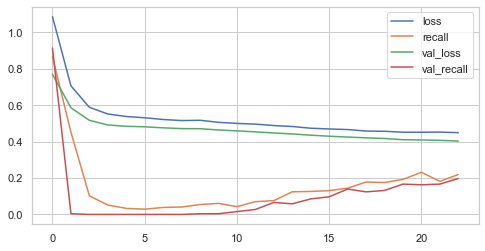

In [166]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

# early_stop erken kapandigi icin model ogrenemedi

In [167]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.4063117504119873
recall :  0.27962085604667664


In [168]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


32/32 [==============================] - 0s 1ms/step
[[778  11]
 [152  59]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       789
           1       0.84      0.28      0.42       211

    accuracy                           0.84      1000
   macro avg       0.84      0.63      0.66      1000
weighted avg       0.84      0.84      0.80      1000



In [169]:
precision_recall_curve(y_test, y_pred_proba)

(array([0.211     , 0.21121121, 0.21142285, ..., 1.        , 1.        ,
        1.        ]),
 array([1.        , 1.        , 1.        , ..., 0.00947867, 0.00473934,
        0.        ]),
 array([0.0198013 , 0.02406902, 0.0248485 , 0.02693272, 0.02738518,
        0.02821527, 0.02832036, 0.02943697, 0.03158119, 0.03198673,
        0.0321741 , 0.03260734, 0.03292276, 0.03364143, 0.0341731 ,
        0.0342068 , 0.03421561, 0.03510112, 0.03531405, 0.03534726,
        0.03562632, 0.03569562, 0.03583593, 0.03617591, 0.03686705,
        0.03727007, 0.03756947, 0.03816072, 0.03862549, 0.03913308,
        0.03920373, 0.03928564, 0.03942107, 0.03952834, 0.03971224,
        0.04015667, 0.04017032, 0.04036157, 0.04109127, 0.04222953,
        0.04282295, 0.04290035, 0.04326808, 0.04340039, 0.04358431,
        0.04374013, 0.04400508, 0.04410791, 0.04432479, 0.04445666,
        0.04457364, 0.04521088, 0.04529084, 0.04555482, 0.04574501,
        0.0457665 , 0.04578509, 0.04603836, 0.04689096, 0.0470

## GridSearchCV

In [170]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adadelta, RMSprop, Nadam, Adam, SGD

In [171]:
def build_classifier(optimizer,learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units=16, activation='relu'))
    classifier.add(Dense(units=8, activation='relu'))
    classifier.add(Dense(units=4, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer(learn_rate),
                       loss='binary_crossentropy',
                       metrics=['Recall'])
    return classifier

In [172]:
class_weights

{0: 0.6272651240591023, 1: 2.4644030668127055}

In [173]:
tf.random.set_seed(seed)

classifier = KerasClassifier(build_fn=build_classifier, epochs=200)
parameters = {
    'batch_size': [128, 256],
    'optimizer': [Adam, RMSprop, Nadam, Adadelta, SGD],
    'learn_rate': [0.001, 0.003, 0.005]
}
grid_model = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring='recall',
                          cv=5,
                          n_jobs=-1,
                          verbose=0).fit(X_train,
                                         y_train,
                                         class_weight=class_weights)

<IPython.core.display.Javascript object>

Epoch 1/200
71/71 [==============================] - 1s 1ms/step - loss: 0.6435 - recall: 0.6939
Epoch 2/200
71/71 [==============================] - 0s 1ms/step - loss: 0.5825 - recall: 0.6840
Epoch 3/200
71/71 [==============================] - 0s 1ms/step - loss: 0.5598 - recall: 0.7097
Epoch 4/200
71/71 [==============================] - 0s 1ms/step - loss: 0.5382 - recall: 0.7289
Epoch 5/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5210 - recall: 0.7333
Epoch 6/200
71/71 [==============================] - 0s 1ms/step - loss: 0.5074 - recall: 0.7393
Epoch 7/200
71/71 [==============================] - 0s 1ms/step - loss: 0.5008 - recall: 0.7300
Epoch 8/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4983 - recall: 0.7388
Epoch 9/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4913 - recall: 0.7322
Epoch 10/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4857 - recall: 0.7284
Epoch 11/200
71/71 [=========

71/71 [==============================] - 0s 1ms/step - loss: 0.4420 - recall: 0.7629
Epoch 85/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4449 - recall: 0.7547
Epoch 86/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4447 - recall: 0.7634
Epoch 87/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4455 - recall: 0.7574
Epoch 88/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4441 - recall: 0.7738
Epoch 89/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4423 - recall: 0.7683
Epoch 90/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4432 - recall: 0.7651
Epoch 91/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4421 - recall: 0.7607
Epoch 92/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4427 - recall: 0.7662
Epoch 93/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4427 - recall: 0.7574
Epoch 94/200
71/71 [=============

71/71 [==============================] - 0s 1ms/step - loss: 0.4315 - recall: 0.7798
Epoch 168/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4305 - recall: 0.7831
Epoch 169/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4308 - recall: 0.7700
Epoch 170/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4290 - recall: 0.7755
Epoch 171/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4283 - recall: 0.7749
Epoch 172/200
71/71 [==============================] - 0s 2ms/step - loss: 0.4298 - recall: 0.7771
Epoch 173/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4279 - recall: 0.7749
Epoch 174/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4294 - recall: 0.7738
Epoch 175/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4301 - recall: 0.7678
Epoch 176/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4301 - recall: 0.7700
Epoch 177/200
71/71 [===

In [174]:
grid_model.best_score_

0.7954289934002066

In [175]:
grid_model.best_params_

{'batch_size': 128,
 'learn_rate': 0.005,
 'optimizer': keras.optimizers.optimizer_v2.rmsprop.RMSprop}

In [176]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values('rank_test_score')
grid_result

,mean_test_score,std_test_score,rank_test_score,params
11,0.7954,0.1069,1,"{'batch_size': 128, 'learn_rate': 0.005, 'opti..."
21,0.7674,0.0929,2,"{'batch_size': 256, 'learn_rate': 0.003, 'opti..."
0,0.7654,0.0280,3,"{'batch_size': 128, 'learn_rate': 0.001, 'opti..."
25,0.7536,0.0552,4,"{'batch_size': 256, 'learn_rate': 0.005, 'opti..."
22,0.7526,0.0317,5,"{'batch_size': 256, 'learn_rate': 0.003, 'opti..."
16,0.7504,0.0625,6,"{'batch_size': 256, 'learn_rate': 0.001, 'opti..."
17,0.7442,0.0584,7,"{'batch_size': 256, 'learn_rate': 0.001, 'opti..."
2,0.7418,0.0409,8,"{'batch_size': 128, 'learn_rate': 0.001, 'opti..."
27,0.7376,0.0959,9,"{'batch_size': 256, 'learn_rate': 0.005, 'opti..."
5,0.7366,0.0248,10,"{'batch_size': 128, 'learn_rate': 0.003, 'opti..."


In [177]:
y_pred = (grid_model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[678 111]
 [ 64 147]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       789
           1       0.57      0.70      0.63       211

    accuracy                           0.82      1000
   macro avg       0.74      0.78      0.76      1000
weighted avg       0.84      0.82      0.83      1000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

32/32 [==============================] - 0s 1ms/step


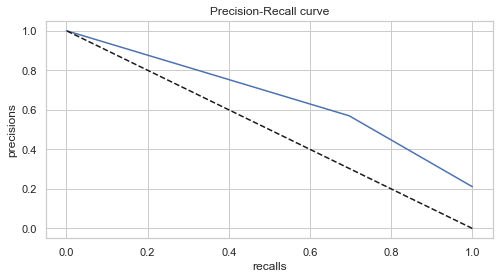

In [181]:
y_pred_proba = grid_model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.plot([1,0],[0,1],'k--')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [182]:
average_precision_score(y_test, y_pred_proba)

0.4609469855615563

In [183]:
roc_auc_score(y_test, y_pred_proba)

0.7779990269042942

# Final Model and Model Deployment

In [184]:
scaler = MinMaxScaler().fit(X)

In [185]:
import pickle
pickle.dump(scaler, open("scaler_churn_recall", 'wb'))

In [186]:
X_scaled = scaler.transform(X)

In [229]:
tf.random.set_seed(seed)
final_model = Sequential()
final_model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
final_model.add(Dense(8, activation='relu'))
final_model.add(Dense(4, activation='relu'))
final_model.add(Dense(1, activation='sigmoid'))

final_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['Recall'])

In [230]:
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6272651240591023, 1: 2.4644030668127055}

In [231]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=20)

In [232]:
final_model.fit(x=X_train,
                y=y_train,
                validation_split=0.15,
                batch_size=Batch,
                epochs=Epochs,
                verbose=1,
                callbacks=[early_stop],
                class_weight=class_weights)

Epoch 1/1000
50/50 [==============================] - 1s 5ms/step - loss: 0.7967 - recall: 0.9943 - val_loss: 0.7882 - val_recall: 0.9884
Epoch 2/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6765 - recall: 0.8597 - val_loss: 0.6879 - val_recall: 0.6395
Epoch 3/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6382 - recall: 0.6671 - val_loss: 0.6601 - val_recall: 0.6240
Epoch 4/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6179 - recall: 0.6703 - val_loss: 0.6292 - val_recall: 0.5969
Epoch 5/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6033 - recall: 0.6747 - val_loss: 0.6080 - val_recall: 0.5969
Epoch 6/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5921 - recall: 0.7009 - val_loss: 0.6179 - val_recall: 0.6783
Epoch 7/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5823 - recall: 0.6894 - val_loss: 0.5987 - val_recall: 0.6667
Epoch 8/1000
50/50 [==============

50/50 [==============================] - 0s 2ms/step - loss: 0.4724 - recall: 0.7583 - val_loss: 0.4643 - val_recall: 0.7209
Epoch 61/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4706 - recall: 0.7647 - val_loss: 0.4705 - val_recall: 0.7248
Epoch 62/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4700 - recall: 0.7602 - val_loss: 0.4441 - val_recall: 0.6899
Epoch 63/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4711 - recall: 0.7519 - val_loss: 0.4976 - val_recall: 0.7597
Epoch 64/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4693 - recall: 0.7653 - val_loss: 0.4911 - val_recall: 0.7558
Epoch 65/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4695 - recall: 0.7596 - val_loss: 0.4928 - val_recall: 0.7558
Epoch 66/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4683 - recall: 0.7666 - val_loss: 0.4744 - val_recall: 0.7287
Epoch 67/1000
50/50 [====================

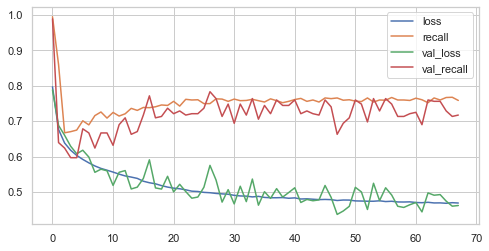

In [233]:
loss_df = pd.DataFrame(final_model.history.history)
loss_df.plot();

In [234]:
loss, recall = final_model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.4575863480567932
recall :  0.7440758347511292


In [235]:
y_pred = (final_model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 996us/step
[[616 173]
 [ 54 157]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       789
           1       0.48      0.74      0.58       211

    accuracy                           0.77      1000
   macro avg       0.70      0.76      0.71      1000
weighted avg       0.83      0.77      0.79      1000



In [236]:
final_model.save('model_churn_recall.h5')

## Loading Model

In [237]:
from tensorflow.keras.models import load_model

In [238]:
model_exited = load_model('model_churn_recall.h5')

In [239]:
scaler_fake_churn = pickle.load(open("scaler_churn_recall", "rb"))

## Prediction

In [240]:
sample = df.sample(n=20, random_state=101).iloc[0:20, :11]
sample
# ornegi dataframe olarak vermemiz lazim 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
6676,619,52,8,0.0000,2,1,1,123242.1100,0,0,1
6421,616,23,8,73112.9500,1,1,1,62733.0500,0,0,0
9834,516,46,6,62212.2900,1,0,1,171681.8600,1,0,0
8492,494,28,9,114731.7600,2,0,1,79479.7400,0,0,0
9982,655,46,7,137145.1200,1,1,0,115146.4000,1,1,0
8844,695,35,7,0.0000,2,1,0,160387.9800,0,0,1
7247,582,40,3,110150.4300,1,1,1,191757.6500,1,1,0
5862,682,40,4,0.0000,2,1,1,140745.9100,0,0,0
3662,632,28,5,118890.8100,1,0,1,145157.9700,0,0,0
3457,657,36,8,188241.0500,2,0,0,183058.5100,1,0,1


In [241]:
sample_scaled = scaler_fake_churn.transform(sample) # transform

In [242]:
# hali hazirda egitilmis modelden prediction aliyoruz 

prediction = pd.DataFrame(model_exited.predict(sample_scaled) > 0.5, columns=['prediction']).astype("float64")
prediction

1/1 [==============================] - 0s 66ms/step


,prediction
0,0.0000
1,0.0000
2,1.0000
3,0.0000
4,1.0000
5,0.0000
6,1.0000
7,0.0000
8,0.0000
9,0.0000


In [243]:
actual = pd.DataFrame(df.sample(n=20, random_state=101)["Exited"]).rename({'Exited': 'actual'}, axis=1).astype("float64")
actual 

,actual
6676,0.0000
6421,0.0000
9834,1.0000
8492,0.0000
9982,1.0000
8844,0.0000
7247,1.0000
5862,0.0000
3662,0.0000
3457,1.0000


In [244]:
pred_df = actual.join(prediction.set_index(actual.index))

pred_df

,actual,prediction
6676,0.0000,0.0000
6421,0.0000,0.0000
9834,1.0000,1.0000
8492,0.0000,0.0000
9982,1.0000,1.0000
8844,0.0000,0.0000
7247,1.0000,1.0000
5862,0.0000,0.0000
3662,0.0000,0.0000
3457,1.0000,0.0000


In [245]:
pred_df['prediction_accuracy'] = pred_df.apply(lambda x: "TRUE" if int(x['actual'] == x['prediction']) else "FALSE", axis=1)

pred_df

,actual,prediction,prediction_accuracy
6676,0.0000,0.0000,TRUE
6421,0.0000,0.0000,TRUE
9834,1.0000,1.0000,TRUE
8492,0.0000,0.0000,TRUE
9982,1.0000,1.0000,TRUE
8844,0.0000,0.0000,TRUE
7247,1.0000,1.0000,TRUE
5862,0.0000,0.0000,TRUE
3662,0.0000,0.0000,TRUE
3457,1.0000,0.0000,FALSE


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___